# Creating customer segments

The goal of this project is to analyze the spending behaviors of the customers regarding to some specific products. We will group customers in clusters based on spending behavior. You can find the dataset of  this project here: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers.

In [108]:
# import some libraries here
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('.../Wholesale_customers_data.csv')

In [5]:
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [6]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Since the aim of this project is to group the products, we can remove the feautures "Channel" and "Region" which are not useful in clustering.

In [7]:
data.drop(['Region', 'Channel'], axis=1, inplace = True)

In [106]:
display(data.head(5))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


We check the number of missing values:

In [9]:
data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


We can see that all the data are numerical variables and we don't have any missing values.

Let's see the mean of each category:

In [11]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [12]:
list(data.columns)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [13]:
mean_lst=[]
for i in list(data.columns):
    mean_lst.append(data[i].mean())

In [14]:
pd.DataFrame(mean_lst, index=data.columns, columns= ['mean of each category'])

,mean of each category
Fresh,12000.297727
Milk,5796.265909
Grocery,7951.277273
Frozen,3071.931818
Detergents_Paper,2881.493182
Delicassen,1524.870455


By comparing some random samples from our data with the mean of the each category, we can guess who the users are. 

In [102]:
#choose some random samples
samples_lst=[35,130,357]

In [103]:
samples= pd.DataFrame(data.loc[samples_lst], columns = data.keys()).reset_index(drop = True)


In [107]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,688,5491,11091,833,4239,436
1,7149,2428,699,6316,395,911
2,37,1275,22272,137,6747,110


Let's look at the samples to guess who they are:

#### First sample:
The first sample has a high spending on the *Milk* products, *Grocery* and *Detergents_Paper*  compared to the averages. There are less spending of *Fresh*, *Frozen* and *Delicassen* compared to the averages. For me it can be a nearly big **supermarket**.

#### Second sample:
In the second sample, the spending on *Grocery*, *Detergents_Paper* and *Delicassen* are small. The spending of *Frozen* is big compared to the average and the spending on *Milk* and *Fresh* are quite big compared to whole spending for this sample. For me this sample can represent **restaurant** or **cafe** which provides food, icecream, coffee and similar stuff.

#### Third smaple:
In the third sample, the spending on *Grocery* is really huge comapared to the averge. The spending on *Milk* and *Detergents_Paper* are also big. The spending on *Fresh*, *Frozen* products and *Delicassen* are quite small. It can be a supermarket which offers everyday items like **convenience store**.

#### Relations between features:

We look at the features to understand whether they are related to each other or not. In other words, we want to understand that when the customers buy some amount of one category, they buy necessarily  some proportional amount of another category. For example, we want to know whether a customer buys large amount of milk, he/she also buys large amount of grocery.

For this purpose, we can consider one feature as the target, and, using other feautures, we will predict the target. In fact, with this explanation we have a supervised learning problem.

In [20]:
#define a function which take each feature as a target and using other features to predict the target
#and give back the error.
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

def score_func(data, target):
    input_data = data.drop(target, axis=1)
    model_reg = DecisionTreeRegressor()
    sc = cross_val_score(model_reg, input_data, data[target], cv=5, scoring = 'r2')
    score =sc.mean()
    return score
    

In [21]:
score_func(data, 'Grocery') 

0.5927938806646086

In [22]:
score_target = []
for targ in list(data.columns):
    score_target.append(score_func(data, targ))
print(list(score_target))
    

[-0.8675482842008886, 0.22180431587369562, 0.5923645737694947, -3.338023243024131, 0.6401838745267223, -7.007335667314638]


In [23]:
table_target = pd.DataFrame(list(score_target), index = list(data.columns), columns = ['score'])
display(table_target)

,score
Fresh,-0.867548
Milk,0.221804
Grocery,0.592365
Frozen,-3.338023
Detergents_Paper,0.640184
Delicassen,-7.007336


From the table, we see that, by using other features, it is possible to predict *Grocery* and *Detergents_Paper*. In converse, predicting categories *Fresh*, *Frozen* and *Delicassen* using other features is not a good way to solve the problem! 

We can also see the correlation among features: 

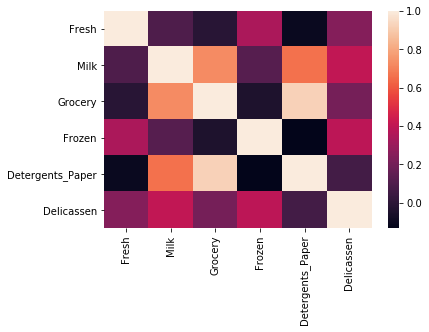

In [24]:
sns.heatmap(data.corr())

From the heatmap, we can see that there are some relation between some features.

**Grocery** and **Detergents_Paper** have high correlation, \
**Grocery** and **Milk** have quite high correlation, \
**Milk** and **Detergents_Paper** have quite high correlation.

We can conclude that the category *Grocery* might not be neccessary feature in our problem since we can predict it using other features. Also, we can see that the features *milk* and *Grocery* are highly correlated but from r2_score that we computed, we could not predict this feature from others so it seems that the feature *Milk* is one neccessary feature in our problem. 

## Data preprocessing:

Our aim is to cluster the spending behaviors of the customers. Therefore it is neccessary to scale our data and also to remove the outliers, since having outliers can directly effect on choosing centroids and consequently the clustering.

### Feature scaling:

Let's see whether our data are nomally distributed or not:

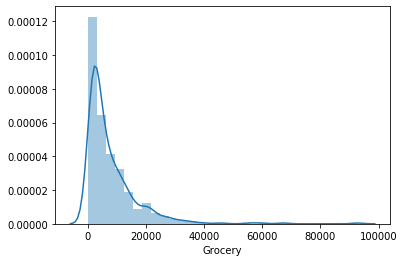

In [27]:
sns.distplot(data['Grocery'], hist=True, kde=True, bins=30)

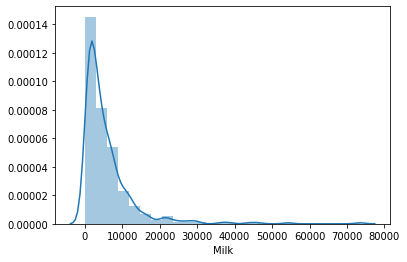

In [28]:
sns.distplot(data['Milk'], hist= True, kde= True, bins=25)

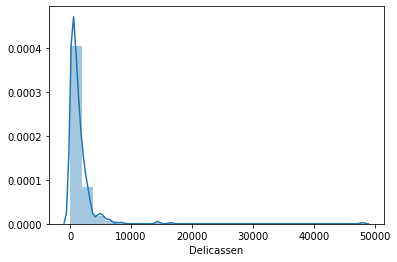

In [29]:
sns.distplot(data['Delicassen'], hist= True, kde= True, bins=25) 

For example, we check the data corresponding to the features Delicassen and Milk, which have high positive skew. We use log-transform to normalize the data.

In [30]:
normalized_data = np.log(data)

Let's check the Milk category after normalization.

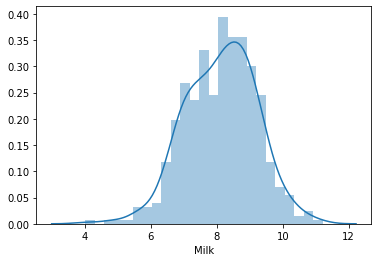

In [31]:
sns.distplot(normalized_data['Milk'], hist= True, kde= True, bins=25) 

### Removing outliers:

For determining outliers, we use *Tukey’s Method*. We compute **IQR** then we consider the data between $Q_1 - 1.5$IQR and $Q_3 + 1.5$IQR as the outliers. 

In [32]:
#calculate Q_1(5th percentile of the data), Q_3(75th percentile of the data) and IQR:
outliers = []
for i in list(normalized_data.columns):
    Q_1 = np.percentile(normalized_data[i], 25)
    Q_3 = np.percentile(normalized_data[i], 75)
    IQR = (Q_3 - Q_1) * 1.5 
    print(i)
    without_out = normalized_data[~((normalized_data[i] >= Q_1 - IQR) & (normalized_data[i] <= Q_3 + IQR))]
    display(without_out)
    outliers = outliers + list(without_out.index.values)
    #print(outliers)
     

Fresh


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Milk


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Grocery


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Frozen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Detergents_Paper


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Delicassen


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


We will remove the outliers which are common for at least two features.


In [33]:
total_outliers = list(set([i for i in outliers if outliers.count(i)>1]))

In [34]:
print("total outliers: ", total_outliers)

total outliers:  [128, 65, 66, 75, 154]


In [35]:
#remove the outliers:
new_data = normalized_data.drop(normalized_data.index[total_outliers]).reset_index(drop = True)


In [36]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fresh             435 non-null    float64
 1   Milk              435 non-null    float64
 2   Grocery           435 non-null    float64
 3   Frozen            435 non-null    float64
 4   Detergents_Paper  435 non-null    float64
 5   Delicassen        435 non-null    float64
dtypes: float64(6)
memory usage: 20.5 KB


## Principal dimensionality analysis

The goal of *Principal dimensioanlity analysis* (*PCA*) is to compress a dataset into a lower-dimensional feature subspace and to discover which components (dimensions) have the best maximize variance of the features. The cumulative explained variance ratio is the way to determine which components are necessary to be chosen. We note that a component of PCA can be considered a new feature of the data, however it is a composition of the original features. \
We want to reduce the dimension of our dataset  into a new lower hyperplane of the features. Therefore we select the subset of the eigenvectors (principal components) that contains most of the information. In other words it gives larger variance.

In [37]:
#implementing pca
from sklearn.decomposition import PCA

We first consider the dimension as the number of features and apply pca.

In [38]:
pca_6 = PCA(n_components = 6)
pca_6.fit(new_data)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
explained_variance = pca_6.explained_variance_ratio_

In [43]:
list(explained_variance)

[0.4430250474896133,
 0.2637921833172004,
 0.12306380110999332,
 0.10120907803415435,
 0.04850196380380071,
 0.02040792624523799]

In [44]:
some_feat= ["dim1", "dim2", "dim3", "dim4", "dim5", "dim6"]

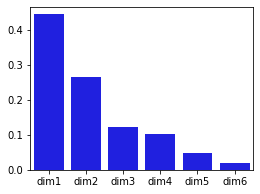

In [45]:
# visualize the explained_variance_ratio
plt.figure(figsize=(4,3))
sns.barplot(x = some_feat ,y = explained_variance ,color = 'blue' ,ci = None ,estimator = max)

As we can see the first two dimensions can give us the 44.30 + 26.37=  70.67 %  of the variance. The first fourth dimesnions gives us 70.67 + 12.30 +10.12 = 93.09 % of the variance. The last two dimensions only gives us less then 10% variance so we can ignore them.

To see each dimension is combination of which features, we have the following visualization:

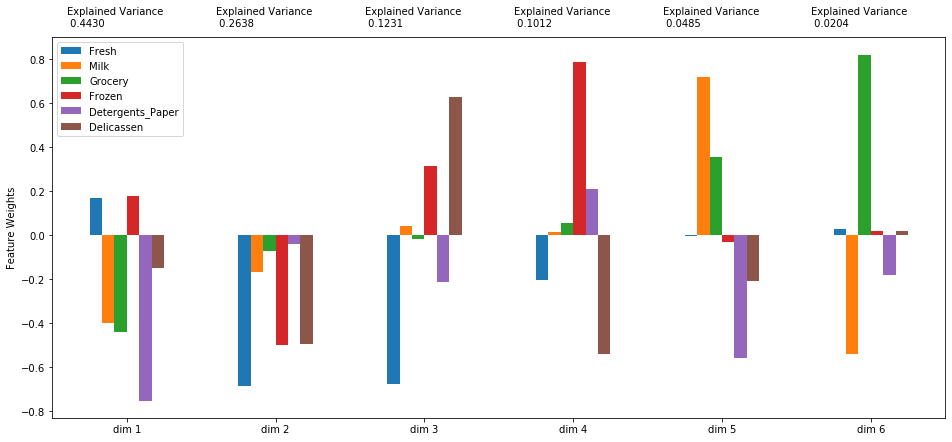

In [49]:
#we should write a function for the visaulization of each dimensions
def pca_results(new_data, pca_6):
    dimensions = ['dim {}'.format(i) for i in range(1,7)]

# PCA components
    components = pd.DataFrame(np.round(pca_6.components_, 4), columns = list(new_data.keys()))
    components.index = dimensions

# PCA explained variance
    ratios = pca_6.explained_variance_ratio_.reshape(6, 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 5), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

# Now we create a bar plot visualization
    fig, ax = plt.subplots(figsize = (16,7))

# Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


# Display the explained variance ratios
    for i, j in enumerate(pca_6.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(j))


# Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

#now apply the function to the data
pca_results = pca_results(new_data, pca_6)

Now we look at each dimension to see they are affected by which features more:

**dim1** (the first principal component, PC1): There is a high correlation among "Detergents_Paper", "Milk" and "Grocery", it means that if a customer buys "Detergents_Paper", he/she tends to buy Milk" and "Grocery". There is also high correlation between PC1 and all mentioned categories, for example the correlation between PC1 and "Detergents_Paper" is more than 0.75. Threfore we can forget about the categories "Frozen", "Delicassen" and "Fresh". With this explanation, PC1 can show customers that spend significant amounts on "Detergents_Paper", "Milk" and "Grocery".  It can represent convenience stores for everyday shopping.

**dim2** (the second principal component, PC2): There is a high correlation among "Fresh", "Frozen" and "Delicassen". It can represent restaurants, and there is high corrolation between PC2 and the mentioned categories. For example the correlation between Pc2 and Fresh is ~0.7. We can forget about the categories "Grocery", "Milk" and "Detergents_Paper". PC2 increases when the customers spend more on "Fresh" and then on "Frozen" and "Delicassen". PC2 can represent restaurant/cafe.

**dim3** (the third principal component PC3): There is correlation between "Frozen" and "Delicassen". PC3 has quite high correlation with "Delicassen" nearly 0.6. On the other side there is a high correlation between PC3 and "Fresh" ~0.7. If wee look at the aboslute value, the correlation between "Fresh" and PC3 is bigger than the correlation between PC3 and "Delicassen", so we can change the sign to have bigger postive correlation! We can conclude: in this case customers spend more on "Fresh". PC3 can represent organic stores. 

**dim4** (the fourth principal component, PC4): there is high correlation between PC4 and "Frozen" ~0.75. Also there is a quite high correlation beween "Delicassen" and PC4 nearly 0.6. In this case customers spend more money on "Delicassen". It can represent the shops who sell prepared food.

Now, we can plot the number of principal components which gives the high variance of the data. 

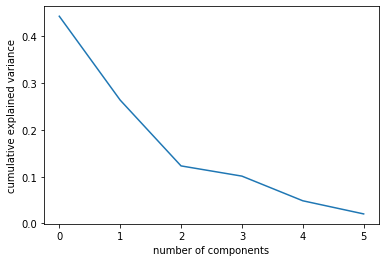

In [109]:
plt.plot(pca_6.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


As we mentioned, if we choose 2 principal componenets, we have 70.67 % of the variance of the data: 

In [53]:
pca_2 = PCA(n_components = 2)
pca_2.fit(new_data)
dim_2=pca_2.transform(new_data)
dim_2_data = pd.DataFrame(np.round(dim_2,4), columns = ['dim1', 'dim2'])

In [54]:
dim_2_data.head(5)

,dim1,dim2
0,-1.7580,0.0097
1,-1.7887,-0.8123
2,-1.8834,-1.5991
3,1.1553,-1.4052
4,-0.7848,-2.3943


## Clustering:

Now, we use **K-Means clustering** to group our data into the various customer segments. In the previous section we have seen that by choosing 2 principal components we have 70.67% variance of the data and with choosing 4 principal components we have 93.09% of variance of the data. We consider that the data is reduced from 6-dimensional to 2-dimensional; i.e. n_components=2.

In [55]:
#predict the clusters 
from sklearn.cluster import KMeans

clusterer_2 = KMeans(n_clusters = 2)
clusterer_2.fit(dim_2_data)
pred_2 = clusterer_2.predict(dim_2_data)


The methods that we can evaluate our clusters are elbow method and silhouette method. We use silhouette method to evalute our work. For computing silhouette score, we need to compute each silhouette coefficients of each data point, call it s(i), and then take the average of all s(i) for each clusters. The value of the silhouette coefﬁcient is in interval $[-1,1]$. Score of 1 says that the data point is very compact within the cluster to which it belongs and far away from the other clusters. The scores near 0 denote overlapping clusters. And the worst score is -1 which shows that something is wrong in the clustering.

In [56]:
#compute silhouette_score for having 2 clusters
from sklearn.metrics import silhouette_score

score_2 = silhouette_score(dim_2_data, pred_2)

In [57]:
score_2

0.4262813930086023

We can compute the scores for example for 15 clusters and then we can compare which number for cluster is better.

In [58]:
#compute Silhouette scire for 15 clusters
scores= []
for i in range(2,17):
    clusterer = KMeans(n_clusters = i)
    clusterer.fit(dim_2_data)
    pred = clusterer.predict(dim_2_data)
    score = silhouette_score(dim_2_data, pred)
    scores.append(score)

In [59]:
scores

[0.4262813930086023,
 0.3928370598103405,
 0.33116810651371836,
 0.35099100284363777,
 0.3651493064467552,
 0.364874859635668,
 0.3531324378658911,
 0.3455905145992582,
 0.3732787231427994,
 0.35588436194619666,
 0.3619057084196523,
 0.3711944147402785,
 0.3592674545056767,
 0.3550979083060122,
 0.3497109013107743]

As we can see the best silhouette score is for the case that we have 2 clusters (score=0.42628).

### Visualizing data:

We can plot the 2-dimensional data.

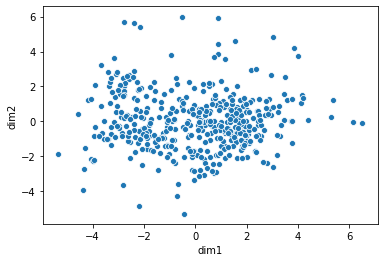

In [76]:
sns.scatterplot(x=dim_2_data['dim1'], y=dim_2_data['dim2'])

We visualize the data with two cluters:

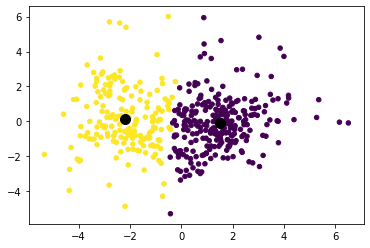

In [75]:
plt.scatter(dim_2_data['dim1'], dim_2_data['dim2'], c=pred_2, s=20, cmap='viridis')

centers = clusterer_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1)

We can see the centers of each cluster and we can explicitly determine them. Each cluster's center point corresponds to the average customer of that segment.

In [79]:
print(centers) 

[[ 1.49093721 -0.10743295]
 [-2.17323107  0.15659548]]


Since the data was transformed by logarithm and also reduced to 2-dimensional, we should recover the centers using inverse_transfrorm and exp()_transform to see what is the spending of each category by each center (cluster).

In [83]:
#apply inverse_transform
inverse_trans = pca_2.inverse_transform(centers)

#apply exp() transform
actual_centers = np.exp(inverse_trans)

# Display the spending  centers
segments = ['Segment {}'.format(i) for i in range(1,3)]
data_centers = pd.DataFrame(np.round(actual_centers), columns = data.keys())
data_centers.index = segments
display(data_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 1,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 2,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


We determine which segment represents which kind of business.

Let's look at the information of the data and then compare each segment with the information of the data.

In [84]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Segment 1**: "Fresh" and "Frozen" is between median and mean, "Milk", "Grocery", "Detergents_Paper" and "Delicassen" are between 25% percentile and median. Most of the spending is for the category **Fresh** and **Frozen**. This segment might be a place which provides food, like cafe or restaurant. 

**Segment 2**: "Fresh", "Frozen" are between 25% percentile and median, "Delicassen" is between mean and median, "Milk", "Grocery" and "Detergents_Paper" are bigger than 75% percetile of the data. Most of spending is for **Milk**, **Grocery** and **Detergents_Paper** i.e every day shopping. This segment can represent supermarket.

Before, we chose three samples and guessed each sample represents which kind of business. Now we can look at the samples again to see each sample is in which cluster and also to see how much our guess is correct. 

In [105]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,688,5491,11091,833,4239,436
1,7149,2428,699,6316,395,911
2,37,1275,22272,137,6747,110


As in the explanation above, sample zero is in segment 2 which represents a supermarket as we guessed. \
Sample one is in segment 1 which represents a cafe or restaurant as we guessed. \
Sample 3 with high amount of grocery and Milk, is in segment 2, which (we guessed) represents the convenience store.